1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [3]:
def dec_bin(n):
    rest = []
    quotient = []
    quotient.append(n // 2)
    rest.append(n % 2)

    i = 0
    while quotient[i] >= 1:
        quotient.append(quotient[i] // 2)
        rest.append(quotient[i] % 2)
        i += 1

    digits = [str(x) for x in rest[::-1]]    # reversed digits of the binary number
    print(int(''.join(digits)))             # print as a int
  
dec_bin(2037)

11111110101


In [4]:
def bin_dec(n):
    digits = [int(x) for x in str(n)]   # digits of the input number

    mult = [digits[i] * pow(2, len(digits)-1-i) for i in range(len(digits))]       # list of multiplication digit x 2^i
    
    print(sum(mult))

bin_dec(11111110101)

2037


In [5]:
def dec_hex(n):
    rest = []
    quotient = []
    quotient.append(n // 16)
    rest.append(n % 16)

    letters = [chr(x) for x in range(ord('a'), ord('f') + 1)]
    dig = [str(x) for x in range(10)]
    hex_digits = dig + letters              # hexadecimal digits

    i = 0
    while quotient[i] >= 1:
        quotient.append(quotient[i] // 16)
        rest.append(quotient[i] % 16)
        i += 1

    digits = [x for x in rest[::-1]]    # reversed digits of the binary number
    result = [hex_digits[i] for i in digits]

    print(''.join(result))         

dec_hex(2037)

7f5


In [6]:
def hex_dec(n):
    digits = []
    for x in str(n):
        try:
            digits.append(int(x))
        except:
            digits.append(ord(x) - 87)
    
    mult = [digits[i] * pow(16, len(digits)-1-i) for i in range(len(digits))]       # list of multiplication digit x 16^i
    
    print(sum(mult))

hex_dec('7f5')

2037


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [7]:
def float32(n):
    bias = 127                     # bias for single precision

    # find the sign
    sign = int(n[0])               # sign is the first digit
    if sign == 0:
        sign = 1
    else:
        sign = -1   

    # convert the exponent
    exp = [n[i] for i in range(1, 9)]
    exp = ''.join(exp)
    exp = int(exp, 2) - bias

    # convert mantissa
    m = [n[i] for i in range(9, 32)]
    mant = [int(m[i]) * pow(2, -(i+1)) for i in range(len(m))]
    mant = sum(mant)
    
    print(sign * (mant + 1) * pow(2, exp))

float32('110000001011000000000000000000000')
float32('00000011111000000000000000000000')

-5.5
1.316553672920962e-36


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [8]:
import sys

# underflow limit
under_limit = sys.float_info.min
n_under = 1

while n_under > under_limit:
    previous_n = n_under
    n_under /= 2

# overflow limit
over_limit = sys.float_info.max
n_over = 1

while n_over < over_limit:
    previous_n = n_over
    n_over *= 2

print('the underflow and overflow limits for python on this computer are', n_under, 'and', n_over)
 

the underflow and overflow limits for python on this computer are 2.2250738585072014e-308 and 179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137216


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [9]:
a = 1
b = 0.1

while a + b != a:
    precision = b
    b /= 2

print('the machine precision is', b)

the machine precision is 8.881784197001253e-17


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [10]:
from math import sqrt

def quad(a, b, c):
    delta = b**2 - 4 * a * c

    x1 = (-b + sqrt(delta)) / (2 * a)
    x2 = (-b - sqrt(delta)) / (2 * a)

    x = [x1, x2]

    print(x)

#### a)

In [11]:
a = 0.001
b = 1000
c = 0.001

quad(a, b, c)

[-9.999894245993346e-07, -999999.999999]


#### b)
re-expressed formula is
$$
x = -\frac{2c}{b \pm \sqrt{b^2 - 4ac}}
$$

In [12]:
def quad2(a, b, c):
    delta = b**2 - 4 * a * c

    x1 = -2 * c /(b + sqrt(delta))
    x2 = -2 * c /(b - sqrt(delta))

    x = [x1, x2]

    print(x)

quad2(a, b, c)

[-1.000000000001e-06, -1000010.5755125057]


#### c) ??????????

In [13]:
def quad3(a, b, c):
    delta = b**2 - 4 * a * c
    sqrt_delta = sqrt(delta)

    x1 = (-b + sqrt_delta)/ (2 * a)
    x2 = (-b - sqrt_delta) / (2 * a)

    x = [x1, x2]

    print(x)

quad3(a, b, c)

[-9.999894245993346e-07, -999999.999999]


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

#### a)

In [14]:
def f(x):
    func = x * (x - 1)
    return func

def derivative (f, delta, x_0):
    der = (f(x_0 + delta) - f(x_0)) / delta
    return(der)

In [15]:
print('the true value of the derivative is 1, but the value found with the computer is', derivative(f, 0.01, 1))

the true value of the derivative is 1, but the value found with the computer is 1.010000000000001


In [16]:
delta_list = [1e-04, 1e-06, 1e-08, 1e-10, 1e-12, 1e-14]
x_0 = 1

derivatives = [derivative(f, d, x_0) for d in delta_list]
print(derivatives)

[1.0000999999998899, 1.0000009999177333, 1.0000000039225287, 1.000000082840371, 1.0000889005833413, 0.9992007221626509]


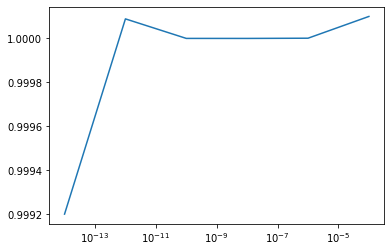

In [17]:
import matplotlib.pyplot as plt

plt.plot(delta_list, derivatives)
plt.xscale('log')

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$ th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


#### a)

In [29]:
import numpy as np

N = 100
h = 2 / N

def f(x):
    return(sqrt(1 - x**2))

def riemann(f, N, h):
    integrand = [h * f(x) for x in np.linspace(-1, 1, N)]
    integral = sum(integrand)
    return(integral)

riemann(f, N, h)


1.5534179294048955

#### b)

In [26]:
N_list = [1000, 10000, 100000, 1000000, 1250000]

for N in N_list:
    print(N)
    %timeit riemann(f, N, h)

1000
929 µs ± 248 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
10000
7.06 ms ± 92.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
100000
73.7 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1000000
790 ms ± 6.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1250000
1.03 s ± 53.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
N1 = 75000000
h1 = 2 / N1
riemann(f, N1, h1)

1.5707963058486936